In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Libraries imported successfully.")

try:
    df = pd.read_csv('Titanic-Dataset.csv')
    print("\nDataset loaded successfully. Showing first 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("\nError: 'titanic.csv' file not found. Please provide the correct file path.")
    exit()

Libraries imported successfully.

Dataset loaded successfully. Showing first 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113

In [3]:
print("\n--- Step 1: Data Exploration ---")
print("\nDataset Info:")
df.info()

print("\nMissing values count:")
print(df.isnull().sum())


--- Step 1: Data Exploration ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
F

In [4]:
print("\n--- Step 2: Handling Missing Values ---")
numeric_features = ['Age', 'Fare']
categorical_features = ['Embarked']

df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


--- Step 2: Handling Missing Values ---


In [5]:
print("\n--- Step 3: Encoding Categorical Features ---")
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("\nDataFrame after encoding:")
print(df.head())

numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)
df_preprocessed = preprocessor.fit_transform(df)
df_preprocessed = pd.DataFrame(df_preprocessed, columns=preprocessor.get_feature_names_out())

print("\nDataFrame after imputation and scaling:")
print(df_preprocessed.head())


--- Step 3: Encoding Categorical Features ---

DataFrame after encoding:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

DataFrame after imputation and scaling:
   num__Age num__Fare remainder__PassengerId remainder__Survived  \
0 -0.565736 -0.502445                      1                   0   
1  0.663861  0.786845                      2                   1   
2 -0.258337 -0.488854                      3                  


--- Step 4: Outlier Detection ---


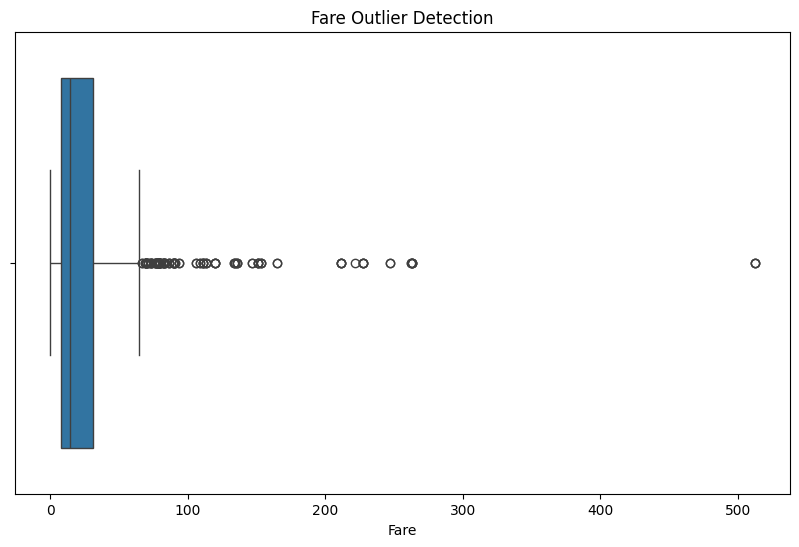


Original DataFrame shape: (891, 10)
DataFrame shape after removing outliers: (871, 10)

All preprocessing steps completed!


In [6]:
print("\n--- Step 4: Outlier Detection ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Outlier Detection')
plt.show()

def remove_outliers_zscore(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[(np.abs(z_scores) < 3)] 
df_no_outliers = remove_outliers_zscore(df, 'Fare')

print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

print("\nAll preprocessing steps completed!")